In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import List
import numpy as np
import pandas as pd

import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from gaussian_model import WhiteNoiseKernel, LinearKernel
from gaussian_model import ExponentialKernel, PeriodicKernel
from gaussian_model import GaussKernel
from gaussian_model import Gaussian_Process_Regression

%matplotlib inline
%matplotlib ipympl

<string>:22: RuntimeWarning: invalid value encountered in sqrt


ValueError: 'y1' is not 1-dimensional

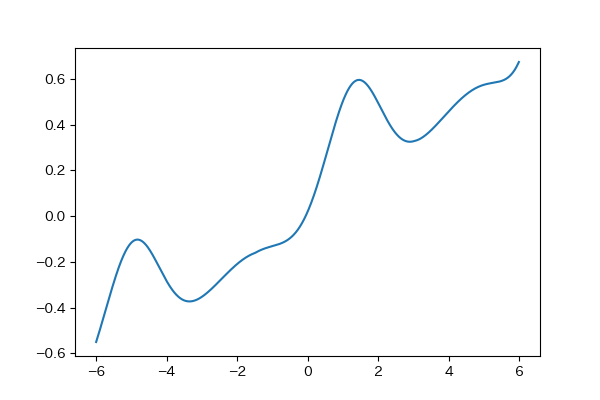

In [7]:
def wave_dataset(size:int, xlim:List=[0, 1], scale:float|None=None) -> pd.DataFrame:
    x = np.random.uniform(xlim[0], xlim[1], size)
    y = 10*np.sin(x)
    if scale is not None:
        noize = np.random.normal(0, scale, size)
        y = y + noize
    df = pd.DataFrame()
    df['x'] = x
    df['y'] = y
    return df

train_num  = 8
train_data = wave_dataset(train_num, xlim=[-5, 5], scale=0.1)
X_axis     = np.arange(-6, 6, 0.01)

kernel = LinearKernel(alpha=1) + GaussKernel(alpha=1, beta=1)                            \
		 + ExponentialKernel(alpha=1, beta=1) + PeriodicKernel(alpha=1, beta=1, gamma=1) \
         + WhiteNoiseKernel(alpha=1)
model  = Gaussian_Process_Regression(
    		train_data['x'].values.reshape((-1, 1)), 
            train_data['y'].values.reshape((-1, 1)),
            kernel=kernel, 
            norm_α=1, 
            l1_ratio=0.1, 
            isStandardization=False)
model.fit(solver="coordinate descent")

pred_mean, pred_std = model.predict(X_axis.reshape((-1, 1)), return_std=True)

# データを描画
plt.figure(figsize=(6, 4))
plt.plot(X_axis, pred_mean, label='カーネル回帰(ガウスカーネル ガウス誤差あり)')
plt.fill_between(X_axis, pred_mean - 3*pred_std, pred_mean + 3*pred_std, alpha=0.5)
plt.scatter(train_data['x'].values, train_data['y'].values, marker='o')
plt.title('sin wave')
plt.xlabel('一様分布からの生成値')
plt.ylabel('sin関数+ノイズ')
plt.ylim((-1.5*10, 1.5*10))
plt.legend()
plt.show()